In [16]:
import json
import sys
import os
import time
import numpy as np
import skimage.transform
import networkx as nx
import cv2

import matplotlib.pyplot as plt

In [17]:
def load_image(scanId, viewpointId):
    HEIGHT = 1024
    WIDTH = 1024
    pano_img = np.zeros((HEIGHT, WIDTH*4, 3), np.uint8)

    for i in range(4):
        image_path = viewpointId + f"_skybox{i + 1}_sami.jpg"
        abs_path = "/home/jiossandon/datasets/Matterport3DSimulator/data/v1/scans"
        rel_path = f"{abs_path}/{scanId}/matterport_skybox_images/{image_path}"
        im = cv2.imread(rel_path)  
        pano_img[:, WIDTH*i:WIDTH*(i+1), :] = im[..., ::-1]
    return pano_img

In [148]:
scanId = '17DRP5sb8fy'
viewpointId = '00ebbf3782c64d74aaf7dd39cd561175'

img = load_image(scanId, viewpointId)

In [149]:
data_path = f"/home/jiossandon/datasets/Matterport3DSimulator/houses/v1/scans/{scanId}/{scanId}/house_segmentations/{scanId}.house"

with open(data_path, 'r') as file:
    lines = file.readlines()

parsed_lines = []

for line in lines:
    separated_line = line.split(" ")
    while ("" in separated_line):
        separated_line.remove("")
    parsed_lines.append(separated_line)

In [150]:
def get_region(viewpointId):
    for line in parsed_lines:
        if line[0] != 'P': 
            continue
        
        if line[1] == viewpointId:
            return line[3]

get_region(viewpointId)

'3'

In [152]:
def get_object_name(object_line):
    category_index = object_line[3]
    for line in parsed_lines:
        if line[0] != 'C':
            continue
        
        if line[1] == category_index:
            return line[3]

def get_objects_names_and_positions(viewpointId):
    region = get_region(viewpointId)
    objects = []
    for line in parsed_lines:
        if line[0] != 'O':
            continue
            
        if line[2] == region:
            objects.append(line[4:7] + [get_object_name(line)])
            
    return objects


data = get_objects_names_and_positions(viewpointId)
            

scanId: 17DRP5sb8fy, viewpointId: 00ebbf3782c64d74aaf7dd39cd561175
P  00ebbf3782c64d74aaf7dd39cd561175  0 3  0  3.52064 -0.501891 1.54282  0 0 0 0 0
['3.60742', '-0.988435', '1.03731', 'wall']
['3.65716', '-0.996136', '2.0063', 'ceiling']
['3.48251', '-0.968298', '0.112687', 'floor']
['4.62341', '-0.531252', '1.47571', 'mirror']
['2.80099', '-0.828473', '1.00345', 'door']
['4.35359', '-0.519822', '0.466405', 'bath#cabinet']
['4.2501', '-1.6494', '0.382824', 'toilet']
['4.37183', '-0.546896', '0.773246', 'sink']
['3.71309', '-1.95555', '0.419891', 'toilet#paper']
['4.33218', '-1.75022', '2.07282', 'light']
['4.35029', '-0.518219', '0.622984', 'counter']
['4.45604', '-1.27812', '0.144403', 'trash#can']
['3.83078', '0.000283532', '1.03579', 'towel']
['4.43966', '-0.940347', '0.783653', 'towel']
['4.44918', '-0.76837', '0.576297', 'unknown']
['4.55607', '-0.329305', '0.910545', 'bottle']
['4.56925', '-1.76356', '0.847978', 'toilet#paper']
['2.40795', '-0.402091', '1.00947', 'doorframe']


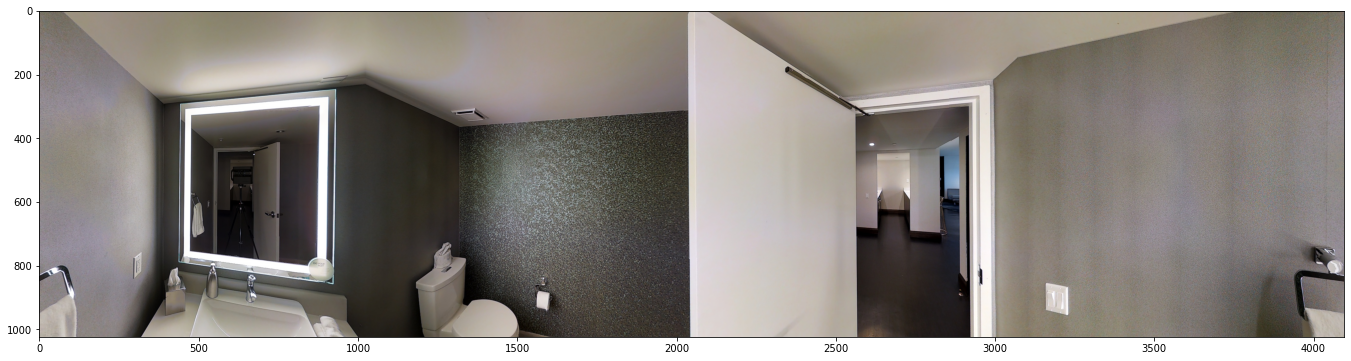

In [155]:
plt.figure(figsize=(40, 6))
plt.imshow(img)

max_x = max(list(float(x[0]) for x in data))
max_y = max(list(float(x[1]) for x in data))
max_z = max(list(float(x[2]) for x in data))

min_x = min(list(float(x[0]) for x in data))
min_y = min(list(float(x[1]) for x in data))
min_z = min(list(float(x[2]) for x in data))

range_x = max_x - min_x
range_y = max_y - min_y
range_z = max_z - min_z

print(f"scanId: {scanId}, viewpointId: {viewpointId}")
print("P  00ebbf3782c64d74aaf7dd39cd561175  0 3  0  3.52064 -0.501891 1.54282  0 0 0 0 0")

for tup in data:
    x, y, z = float(tup[0]), float(tup[1]), float(tup[2])
    
    print(tup)
        
    first_cord = 4000 - (x - abs(min_x))/range_x * 4000
    second_cord = 1000 - (y - abs(min_y))/range_y * 1000
        
    #plt.plot(first_cord, second_cord, color="red", marker="v", linewidth=3)
    #plt.annotate(tup[3], (first_cord, second_cord))

plt.show()